# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

# Opgave 1

Optimal choices:
LM = 4.50, HM = 4.50, LF = 4.50, HF = 4.50


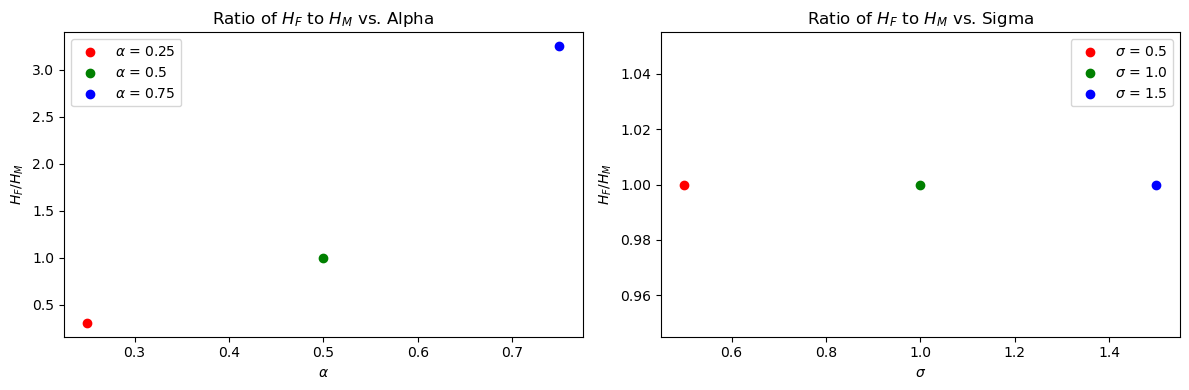

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from Nicholas import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# solve the model for the default parameters
model.par.alpha = 0.5
model.par.sigma = 1.0
opt = model.solve_discrete()

# print the results
print("Optimal choices:")
print(f"LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f}")

# plot H_F/H_M vs alpha
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax = axs[0]
alphas = [0.25, 0.5, 0.75]
colors = ['red', 'green', 'blue']

for i, alpha in enumerate(alphas):
    model.par.alpha = alpha
    model.par.sigma = 1.0
    opt = model.solve_discrete()
    ax.scatter(alpha, opt.HF/opt.HM, label=r'$\alpha$ = {}'.format(alpha), color=colors[i])

ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Ratio of $H_F$ to $H_M$ vs. Alpha')
ax.legend()

# plot H_F/H_M vs sigma
ax = axs[1]
sigmas = [0.5, 1.0, 1.5]
colors = ['red', 'green', 'blue']

for i, sigma in enumerate(sigmas):
    model.par.sigma = sigma
    model.par.alpha = 0.5
    opt = model.solve_discrete()
    ax.scatter(sigma, opt.HF/opt.HM, label=r'$\sigma$ = {}'.format(sigma), color=colors[i])

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$H_F / H_M$')
ax.set_title('Ratio of $H_F$ to $H_M$ vs. Sigma')
ax.legend()

# display the plots
plt.tight_layout()
plt.show()

**Intuition**

Så $H_F/H_M$ er det relative tidsforbrug til produktion i hjemmet.

Sigma er substitutionselasticiteten, men når vi udelukkende ændrer i den, vil der ikke ske noget med adfærden hos husholdningen.



# Opgave 2

Overview of what the code below does:
- Import libraries and HouseholdsSpecializationModelClass from the module
- Create an instance of the HouseholdSpecializationModelClass and set default parameters for alpha and sigma
- Initialize empty lists for storing H_F/H_M and log(w_F/w_M)
- Loop through the w_F values provided in model.par.wF_vec and solve the model for each value, appending the results to the lists.
- Create scatter plot
- Display the plot with appropriate labels and legend-

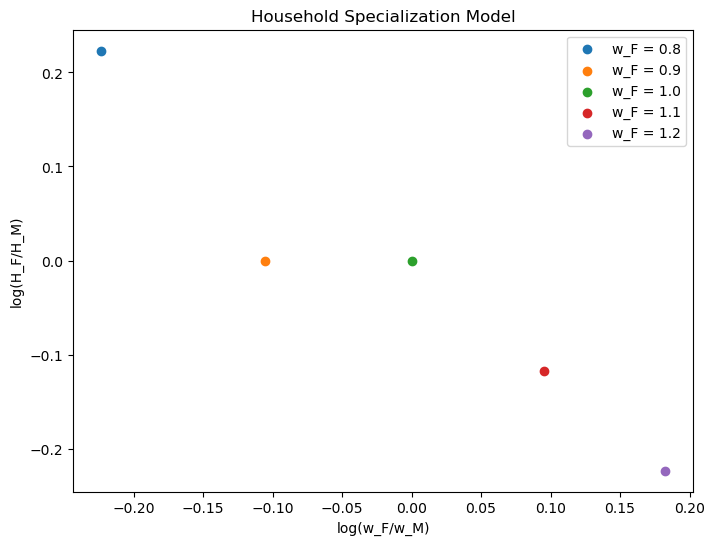

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from Nicholas import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# solve the model for the default parameters
model.par.alpha = 0.5
model.par.sigma = 1.0
opt = model.solve_discrete()

# specify w_F values directly in the main script
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

# create lists to store data for each value of w_F
HF_HM_list = []
log_wf_wm_list = []

# solve the model for each value of w_F
for w_F in wF_values:
    model.par.wF = w_F
    opt = model.solve_discrete()
    HF_HM_list.append(opt.HF/opt.HM)
    log_wf_wm_list.append(np.log(w_F/model.par.wM))

# create the plot
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f"w_F = {wF_values[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

ax.set_title('Household Specialization Model')
plt.show()

Fordi det er diskret, vil orange og grøn være ens, men så snart vi er kontinuert vil det kunne ses.
Når man øger linspace(0,24,97) (altså fra 49 til 97) kan man se det tydeligt.

**Intuition**

- When w_F increaeses, of courese the relative wage ratio w_F/w_M increases, because w_M is held constant.
- When w_F increases, we see $H_F/H_M$ decreasing, which is due to females substituting towards working production, as it has relative comparative advantages for the couple.

# Opgave 3

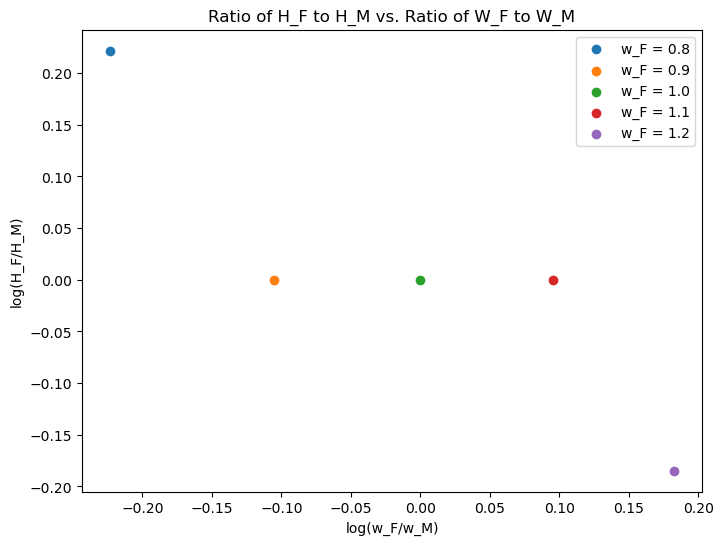

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from Nicholas import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# create lists to store data for each value of w_F
HF_HM_list = []
log_wf_wm_list = []

#Create the list of the values wF we want to go through
wF_vec = np.linspace(0.8,1.2,5) #This adds the wF_vec

# solve the model for each value of w_F
for i, w_F in enumerate(wF_vec):
    model.par.wF = w_F
    opt = model.solve()
    
    if opt is not None:
        model.sol.LM_vec[i], model.sol.HM_vec[i], model.sol.LF_vec[i], model.sol.HF_vec[i] = opt.LM, opt.HM, opt.LF, opt.HF
        HF_HM_list.append(opt.HF / opt.HM)
        log_wf_wm_list.append(np.log(w_F / model.par.wM))
    else:
        print(f"Optimization failed for w_F = {w_F}")
        
# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(len(HF_HM_list)):
    ax.scatter(log_wf_wm_list[i], np.log(HF_HM_list[i]), label=f"w_F = {wF_vec[i]:.1f}")

ax.set_xlabel("log(w_F/w_M)")
ax.set_ylabel("log(H_F/H_M)")
ax.set_title("Ratio of H_F to H_M vs. Ratio of W_F to W_M")
ax.legend()

plt.show()

Imports and set magics:

# Exercise 4



To answer question 4, we need to perform the following steps:

- Create a function that takes $\alpha$ and $\sigma$ as inputs and returns the mean squared error between the model's estimated coefficients ($\hat{\beta}_0$ and $\hat{\beta}_1$) and the empirical coefficients provided ($\beta_0 \approx 0.4$ and $\beta_1 \approx -0.1$).
- Use an optimization method to find the optimal values for $\alpha$ and $\sigma$ that minimize the mean squared error.
- Plot the model's results and compare them to the empirical results.

Illustrate how well the model fits the data.
1. Estimate values of $\beta_0$ and $\beta_1$ using the run_regression
2. Create an array of log(wF/wM) values and use these to calculate predicted value of log(HF/HM) based on estimated values of $\beta_0$ and $\beta_1$.
3. Create scatter plot of the actual data and add a line plot of the predicted value.

In [21]:
# define the target values of beta_0 and beta_1
from scipy import optimize

beta0_target = 0.4
beta1_target = -0.1

# define the bounds for alpha and sigma
bounds = [(0.1, 0.9), (0.1, 1.9)]

# define the objective function
def obj_func(params):
    alpha, sigma = params
    model.estimate(alpha, sigma)
    diff0 = (beta0_target - model.sol.beta0)**2
    diff1 = (beta1_target - model.sol.beta1)**2
    return diff0 + diff1

# use optimize.minimize() to find the values of alpha and sigma that minimize the objective function
res = optimize.minimize(obj_func, x0=[0.5, 1.0], bounds=bounds)

# get the estimated values of alpha and sigma
alpha_hat, sigma_hat = res.x

# print the estimated values
print(f"Estimated alpha: {alpha_hat:.3f}")
print(f"Estimated sigma: {sigma_hat:.3f}")

AttributeError: 'HouseholdSpecializationModelClass' object has no attribute 'estimate'

In [ ]:
from Nicholas import HouseholdSpecializationModelClass

# create an instance of the model class
model = HouseholdSpecializationModelClass()

# 2. Estimate alpha and sigma
model.estimate()

# 3. Print results
print(f"Estimated alpha: {model.par.alpha:.4f}")
print(f"Estimated sigma: {model.par.sigma:.4f}")

# 4. Plot the results
import matplotlib.pyplot as plt

model.solve_wF_vec()
model.run_regression()
plt.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec / model.sol.HM_vec), label='Model')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
    
x = np.log(model.par.wF_vec)
y = model.sol.beta0 + model.sol.beta1 * x
plt.plot(x, y, label='Regression', linestyle='--')
    
plt.legend()
plt.show()

# Question 5

We extend the model with preference parameter $\phi$

WE now plot the empirical data against the extended model with different values of phi, and for a fixed $\alpha$ = 0.5.

First, we create a function that takes $\phi$ as an input and solves the model with a fixed alpha=0.5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Nicholas import HouseholdSpecializationModelClass

def solve_model_with_phi(phi):
    model = HouseholdSpecializationModelClass()
    model.par.phi = phi
    model.estimate(alpha=0.5)
    model.solve_wF_vec()
    model.run_regression()
    return model

phi_values = [0.8, 0.9, 1.0, 1.1, 1.2]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, phi in enumerate(phi_values):
    ax = axes[i // 3, i % 3]

    # Solve the model with given phi
    model = solve_model_with_phi(phi)

    # Plot model results
    ax.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec / model.sol.HM_vec), label=f'Model (phi={phi})')

    # Empirical data (using the estimated beta0 and beta1)
    x = np.log(model.par.wF_vec)
    y = model.sol.beta0 + model.sol.beta1 * x
    ax.plot(x, y, label='Empirical data', linestyle='--')

    ax.set_xlabel('log(wF/wM)')
    ax.set_ylabel('log(HF/HM)')
    ax.legend()

# Remove empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Using our model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Nicholas import HouseholdSpecializationModelClass

#Creating instance of model
model = HouseholdSpecializationModelClass()
model.estimate(alpha=0.5)

#solve model
model.solve_wF_vec()
model.run_regression()

# Plot log(wF/wM) against log(HF/HM) for the model
plt.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec / model.sol.HM_vec), label='Model')

# Plot empirical data using the estimated beta0 and beta1
x = np.log(model.par.wF_vec)
y = model.sol.beta0 + model.sol.beta1 * x
plt.plot(x, y, label='Empirical data', linestyle='--')

plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

# Creating instance of model
model = HouseholdSpecializationModelClass()

# Change the sigma value
model.par.alpha = 0.6  # You can set the value you want here

# Estimate alpha (with fixed alpha=0.5) and the new sigma
model.estimate(alpha=0.6)

# Solve the model for the given wF_vec
model.solve_wF_vec()

# Run regression
model.run_regression()

# Plot the results
plt.scatter(np.log(model.par.wF_vec), np.log(model.sol.HF_vec / model.sol.HM_vec), label='Model')

# Empirical data (using the estimated beta0 and beta1)
x = np.log(model.par.wF_vec)
y = model.sol.beta0 + model.sol.beta1 * x
plt.plot(x, y, label='Empirical data', linestyle='--')

plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.legend()
plt.show()